# Make figures for manuscript on thermal springs & heat flow in the Alps

## Import modules

In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import matplotlib.patches

import lib.various_functions as vf

## Variables:

In [2]:
fn = 'data/thermal_springs_alps_with_HF_estimates.csv'

temp_bins = np.arange(0, 90, 5.0)
log_Q_bins = np.arange(-6, 1, 0.25)

temp_label = u'Spring temperature (°C)'
log_Q_label = r'Log discharge ($m^3 s^{-1}$)'

leg_fs = 'small'

gr = 1.618033

In [3]:
pl.rcParams['mathtext.default'] = 'regular'

## Read thermal spring data

In [4]:
df = pd.read_csv(fn)
df.head()

,spring number,spring location,spring name,long,lat,type,well_depth,flow_rate_mean,flow_rate_min,flow_rate_max,...,thermal_footprint_up_min,thermal_radius_up_min,thermal_footprint_up_best,thermal_radius_up_best,thermal_footprint_up_max,thermal_radius_up_max,Hv_ratio_min,Hv_ratio_best,Hv_ratio_max,flow_rate_est
0,20,Euganei (Euganean geothermal area - Battaglia ...,Fonte Le Bibite,11.778856,45.284444,spring,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011079
1,31,Euganei (Euganean geothermal area - Cinto Euga...,Bagno Nord,11.649967,45.286944,spring,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011079
2,32,Euganei (Euganean geothermal area - Cinto Euga...,Bagno Sud,11.648300,45.285000,spring,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011079
3,33,Euganei (Euganean geothermal area - Cinto Euga...,Fattorelle,11.645522,45.295833,spring,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011079
4,45,Acqui (comment Jacek: general area?),23,8.453005,44.691677,springs and shallow wells,NaN,0.0162,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.023512,0.011584,0.0,0.016200


## Remove springs with 0 flow rate

In [5]:
ind = df['flow_rate'] == 0.0
df.loc[ind, 'flow_rate'] = np.nan

## Some statistics on what type of data are included in the db

In [6]:
cols = ['number of springs']
index = ['temperature', 'flow_rate', ['temperature', 'flow_rate'], ['temperature', 'flow_rate'], 'SiO2', 'delta_18O', 'delta_2H']
ix_labels = ['temperature', 'discharge', 'temperature and discharge', 'temperature or discharge', 'SiO2', 'delta_18O', 'delta_2H']

methods = ['any', 'any', 'any', 'all', 'any', 'any', 'any']

dfs = pd.DataFrame(columns=cols, index=['total'] + ix_labels)

for ix, ixl, m in zip(index, ix_labels, methods):
    #if type(ix) = str:
    dfs.loc[ixl, 'number of springs'] = len(df[ix].dropna(how=m))
    #else:

dfs.loc['total', 'number of springs'] = len(df)
    
dfs

,number of springs
total,394
temperature,364
discharge,241
temperature and discharge,226
temperature or discharge,379
SiO2,136
delta_18O,127
delta_2H,115


## Figure comparing temp and discharge for natural springs and shallow wells

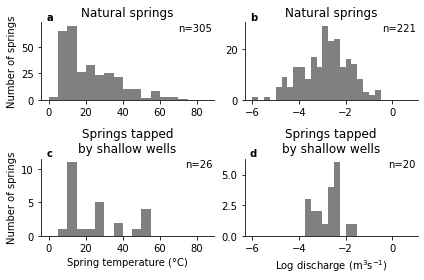

In [7]:
indw = df['type'] == 'well'

ds = [df.loc[indw==False, 'temp_mean'].dropna(), 
      df.loc[indw==False, 'log_flow_rate'].dropna(),
      df.loc[indw, 'temp_mean'].dropna(),
      df.loc[indw, 'log_flow_rate'].dropna()
      ]

bins = [temp_bins, log_Q_bins, 
        temp_bins, log_Q_bins]

fig, axs = pl.subplots(2, 2)
axs = axs.ravel()

for ax, d, b in zip(axs, ds, bins):
    ax.hist(d, bins=b, facecolor='gray')
    tekst = 'n=%i' % (len(d))
    ax.text(0.99, 0.99, tekst, ha='right', va='top', transform=ax.transAxes)

axs[2].set_xlabel(temp_label)
axs[3].set_xlabel(log_Q_label)

axs[0].set_ylabel('Number of springs')
axs[2].set_ylabel('Number of springs')

axs[0].set_title('Natural springs')
axs[1].set_title('Natural springs')

axs[2].set_title('Springs tapped\nby shallow wells')
axs[3].set_title('Springs tapped\nby shallow wells')

for i, panel in enumerate(axs):
    panel.spines['top'].set_visible(False)
    panel.spines['right'].set_visible(False)
    panel.text(0.03, 1.0, string.ascii_lowercase[i], 
            weight='bold', transform=panel.transAxes, ha='left', va='bottom')
    
fig.tight_layout()

fig.savefig('fig/comparison_springs_and_wells.pdf')

**Figure 1** *Comparison of temperature and discharge for natural springs and springs tapped by shallow (<100 m) wells.*

## Si figure on variation of recharge in watersheds

mean variation of rch in watersheds = 17.49 percent
median variation of rch in watersheds = 11.72 percent


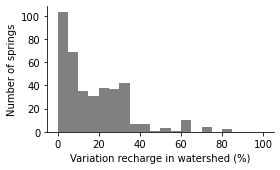

In [8]:
df['percent_rch_var'] = np.abs((df['max_recharge_ws'] - df['min_recharge_ws']) / df['max_recharge_ws'] * 100.0)

fig, ax = pl.subplots(1, 1, figsize=(4, 4/gr))
ax.hist(df['percent_rch_var'].dropna(), color='gray', bins=np.arange(0, 105, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Variation recharge in watershed (%)')
ax.set_ylabel('Number of springs')

fig.tight_layout()

fig.savefig('fig/variation_rch_ws.pdf')

print('mean variation of rch in watersheds = %0.2f percent' % df['percent_rch_var'].mean())
print('median variation of rch in watersheds = %0.2f percent' % df['percent_rch_var'].median())

## Make a figure of contributing area and watershed area

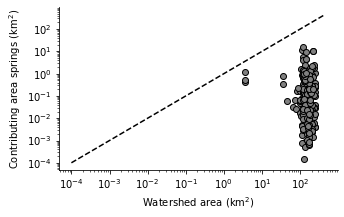

In [9]:
fig, ax = pl.subplots(1, 1, figsize=(5, 3))
ax.scatter(df['watershed_area'] / 1e6, df['contributing_area'] / 1e6, color='gray', edgecolor='black')

ax.plot([1e-4, 450], [1e-4, 450], ls='--', color='black')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Watershed area (km$^2$)')
ax.set_ylabel(r'Contributing area springs (km$^2$)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

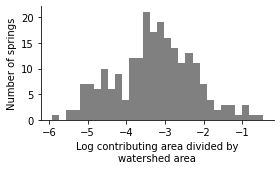

In [10]:


fig, ax = pl.subplots(1, 1, figsize=(4, 4/gr))
d = df['contributing_area'] / df['watershed_area']
d = d.replace([-np.inf, np.inf, 0], np.nan)
ld = np.log10(d.dropna())
ax.hist(ld, bins=30, color='gray')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Log contributing area divided by\nwatershed area')
ax.set_ylabel('Number of springs')

fig.tight_layout()

fig.savefig('fig/contributing_vs_watershed_area_hist.pdf')

## Make a figure of heat flow, contributing area, thermal footprint 

/Users/elcopone/opt/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


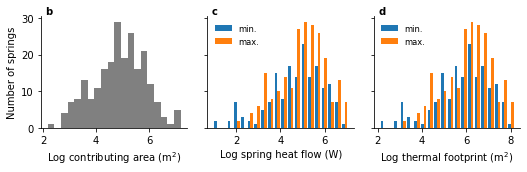

In [11]:
# log transform variables

plot_vars = ['contributing_area', 'H_net', 'thermal_footprint_net']

labels = [r'Log contributing area ($m^2$)', 'Log spring heat flow (W)', 
          r'Log thermal footprint ($m^2$)']

add_mm = [False, True, True]

mm = ['min', 'max']

plot_var_vals = []

for p, add_mmi in zip(plot_vars, add_mm):
    pi = []
    
    if add_mmi is True:
        for mmi in mm:
            vi = p + '_' + mmi
            d = np.log10(df[vi])
            d = d.replace((-np.inf, np.inf), np.nan)
            d = d.dropna()

            pi.append(d.values)
    else:
        vi = p
        pi = np.log10(df[vi])
        pi = pi.replace((-np.inf, np.inf), np.nan)    
        pi = pi.dropna().values
        
        
    plot_var_vals.append(pi)

#df['log_thermal_footprint_max'] = np.log10(df['thermal_footprint_net_max'])
#df['log_thermal_footprint_max'] = df['log_thermal_footprint_max'].replace((-np.inf, np.inf), np.nan)


#
#xlim = (2, 9)
#xint = 0.25
#bins = np.arange(xlim[0], xlim[1]+ xint, xint)

fig, axs = pl.subplots(1, 3, figsize=(7.5, 7.5/3), sharey=True)

ax = axs.ravel()

for ax, plot_var, val, add_mmi in zip(axs, plot_vars, plot_var_vals, add_mm):
    
    if add_mmi is False:
        ax.hist(val, bins=20, facecolor='gray')
    else:
        ax.hist(val, bins=20, label=['min.', 'max.'])
        ax.legend(frameon=False, fontsize=leg_fs)


#axs[2].hist(df['thermal_footprint_net_best'].dropna(), facecolor='gray', bins=30)


for i, panel in enumerate(axs):
    panel.spines['top'].set_visible(False)
    panel.spines['right'].set_visible(False)
    panel.text(0.03, 1.0, string.ascii_lowercase[i + 1], 
        weight='bold', transform=panel.transAxes, ha='left', va='bottom')

#for ax in axs:
#    ax.set_xlim(xlim)

for ax, l in zip(axs, labels):
    ax.set_xlabel(l)
    
axs[0].set_ylabel('Number of springs')

fig.tight_layout()

fig.savefig('fig/contributing_area_HF_and_thermal_footprint.pdf')
fig.savefig('fig/contributing_area_HF_and_thermal_footprint.png', dpi=200)

**Fig. caption** *Calculated contributing area and thermal footprint for each spring and a comparison with the area of watersheds that the springs are located in.*

In [12]:
print('\nWatershed area stats (m2):\n', df['watershed_area'].describe())

print('\nContributing area stats (m2):\n', df['contributing_area'].describe())

minmaxs = ['min', 'max']

for mm in minmaxs:
    print('\nThermal footprint %s stats (m2):\n' % mm, df['thermal_footprint_net_%s' % mm].describe())
    print('\nThermal radius %s stats (m2):\n' % mm, df['thermal_radius_net_%s' % mm].describe())


Watershed area stats (m2):
 count    3.940000e+02
mean     1.588754e+08
std      4.594397e+07
min      3.500000e+06
25%      1.317250e+08
50%      1.472000e+08
75%      1.842250e+08
max      3.668000e+08
Name: watershed_area, dtype: float64

Contributing area stats (m2):
 count    2.250000e+02
mean     6.129354e+05
std      1.871053e+06
min      1.468059e+02
25%      1.851829e+04
50%      7.262816e+04
75%      3.877195e+05
max      1.590481e+07
Name: contributing_area, dtype: float64

Thermal footprint min stats (m2):
 count    2.260000e+02
mean     4.918801e+06
std      1.208200e+07
min      0.000000e+00
25%      0.000000e+00
50%      3.114644e+05
75%      3.282303e+06
max      9.290677e+07
Name: thermal_footprint_net_min, dtype: float64

Thermal radius min stats (m2):
 count     226.000000
mean      723.873132
std      1022.907831
min         0.000000
25%         0.000000
50%       314.845740
75%      1021.892467
max      5438.119340
Name: thermal_radius_net_min, dtype: float64

The

## Generate curves of SiO2 vs circulation temp

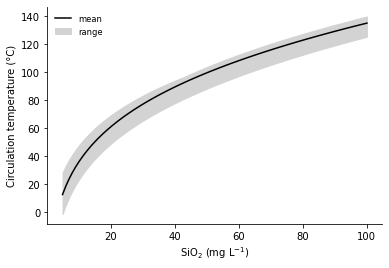

In [13]:
x_si = np.arange(5, 101, 1)

circ_temp_y = vf.SI_geothermometers(x_si)

fig, panel = pl.subplots(1, 1, figsize=(6, 4))

panel.fill_between(x_si, circ_temp_y[1], circ_temp_y[2], color='lightgrey', label='range')
panel.plot(x_si, circ_temp_y[0], color='black', label='mean')
panel.legend(fontsize=leg_fs, frameon=False)

panel.set_xlabel(r'SiO$_2$ (mg L$^{-1}$)')
panel.set_ylabel(u'Circulation temperature (°C)')

panel.spines['top'].set_visible(False)
panel.spines['right'].set_visible(False)

fig.savefig('fig/SiO2_vs_circ_temp.pdf')

## Load precipication d2H/d18O data

In [14]:
dp = pd.read_csv('data/Gesamt_Alpen_GNIP.csv')
dp.columns.tolist()

['Number',
 'Site',
 'Country',
 'Latitude',
 'Longitude',
 'Elevation (m)',
 'Period',
 'd18O',
 'Error',
 'd2H',
 'Error.1',
 'd-excess (‰) Avg',
 'Error.2',
 'Air Temperature (°C) Avg',
 'Error.3',
 'Precipitation (mm) Avg',
 'Error.4',
 'Unnamed: 17']

In [15]:
## Boxes for magmatic and metamorphic dehydration water

# following Rye 1993
magm_2H = [-75, -40] 
magm_18O = [4.0, 9.5] 

# values from Yardley 2009, Sheppard 1986
metamorphic_2H = [-70, 0]
metamorphic_18O = [3, 20]


O18 = np.arange(-17, 0.1, 0.1)
H2 = 10 + 8 * O18

## Make a figure of circulation depth & temp

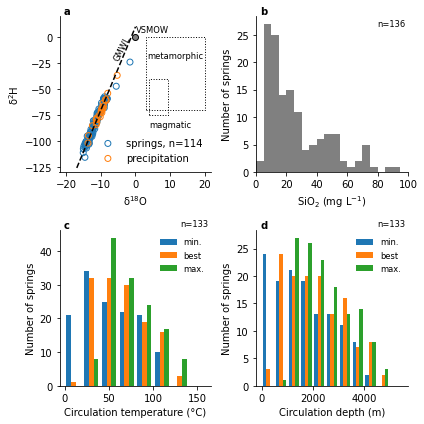

In [16]:
dg = df


colors = pl.rcParams["axes.prop_cycle"].by_key()["color"]

fig, panels_init = pl.subplots(2, 2, figsize=(6, 6))

panels = panels_init.ravel()

fs = 'medium'

spring_label = 'springs, n=%i' % (len(dg.dropna(subset=['delta_18O', 'delta_2H'])))
#prec_label = 'precipitation, n=%i' % len(dp)
prec_label = 'precipitation'
leg_iso_springs = panels[0].scatter(dg['delta_18O'], dg['delta_2H'],
                                    facecolor='none', edgecolor=colors[0], label=spring_label)
leg_iso_precip = panels[0].scatter(dp['d18O'], dp['d2H'], 
                                   facecolor='none', edgecolor=colors[1], 
                                   label=prec_label)

#panels[0].fill_between(magm_18O, [magm_2H[0], magm_2H[0]], 
#                       [magm_2H[1], magm_2H[1]], color='lightgrey', edgecolor='black', linestyle='-')

#panels[0].fill_between(metamorphic_18O, [metamorphic_2H[0], metamorphic_2H[0]], 
#                       [metamorphic_2H[1], metamorphic_2H[1]], 
#                       color='lightgrey', edgecolor='black', linestyle='-')

x0, y0 = metamorphic_18O[0], metamorphic_2H[0]
dx, dy = metamorphic_18O[1] - metamorphic_18O[0], metamorphic_2H[1] - metamorphic_2H[0]
rect = matplotlib.patches.Rectangle((x0, y0), dx, dy,
                                    linewidth=1, edgecolor='black', facecolor='none', ls=':')
panels[0].add_patch(rect)
panels[0].text(x0 + dx/2, y0 + dy * 0.75, 'metamorphic', va='center', ha='center', fontsize=leg_fs)

x0, y0 = magm_18O[0], magm_2H[0]
dx, dy = magm_18O[1] - magm_18O[0], magm_2H[1] - magm_2H[0]
rect = matplotlib.patches.Rectangle((x0, y0), dx, dy,
                                    linewidth=1, edgecolor='black', facecolor='none', ls=':')
panels[0].add_patch(rect)
panels[0].text(x0, y0-5, 'magmatic', va='top', ha='left', fontsize=leg_fs)

panels[0].scatter([0], [0], color='gray', edgecolor='black')
panels[0].text(0, 3, 'VSMOW', ha='left', va='bottom', fontsize=leg_fs)

panels[0].plot(O18, H2, ls='--', color='black')
panels[0].text(O18[-10], H2[-10], 'GMWL', rotation=63, va='top', ha='right', fontsize=leg_fs)

panels[0].set_ylim(-130, 20)
panels[0].set_xlim(-22, 22)

panels[0].legend(loc='lower right', frameon=False)

legh = panels[1].hist(dg['SiO2'].dropna().values, bins=np.arange(0, 100, 5), color='grey')
panels[1].set_xlim(0, 100)

tekst = 'n=%i' % (len(dg['SiO2'].dropna()))
panels[1].text(0.98, 0.98, tekst, ha='right', va='top', 
                 transform=panels[1].transAxes, fontsize=leg_fs)

#panels[1].fill_between(x_si, circ_temp_y[1], circ_temp_y[2], color='lightgrey', label='range')
#panels[1].plot(x_si, circ_temp_y[0], color='black', label='mean')
#panels[1].legend(fontsize=leg_fs, frameon=False)

legh =  panels[2].hist([dg['circulation_temp_min'].dropna().values, 
                dg['circulation_temp_best'].dropna().values,
                dg['circulation_temp_max'].dropna().values], 
               bins=np.arange(0, 180, 20))

tekst = 'n=%i' % (len(dg['circulation_temp_min'].dropna()))
panels[2].text(0.98, 1.01, tekst, ha='right', va='bottom', 
                 transform=panels[2].transAxes, fontsize=leg_fs)

panels[2].legend(legh[-1], ['min.', 'best', 'max.'], fontsize=leg_fs, frameon=False)

legd = panels[3].hist([dg['circ_depth_min'].dropna().values,
                       dg['circ_depth_best'].dropna().values,
                       dg['circ_depth_max'].dropna().values],
                       bins=np.arange(0, 6000, 500))

tekst = 'n=%i' % (len(dg['circ_depth_min'].dropna()))
panels[3].text(0.98, 1.01, tekst, ha='right', va='bottom', 
               transform=panels[3].transAxes, fontsize=leg_fs)

panels[3].legend(legh[-1], ['min.', 'best', 'max.'], fontsize=leg_fs, frameon=False)

for i, panel in enumerate(panels[:]):
    panel.spines['top'].set_visible(False)
    panel.spines['right'].set_visible(False)
    panel.text(0.03, 1.0, string.ascii_lowercase[i], 
        weight='bold', transform=panel.transAxes, ha='left', va='bottom')

for panel in panels[1:]:
    panel.set_ylabel('Number of springs')

panels[0].set_xlabel(r'$\delta ^{18}O$')    
panels[0].set_ylabel(r'$\delta ^{2}H$')    

panels[1].set_xlabel(r'SiO$_2$ (mg L$^{-1}$)')
panels[2].set_xlabel(u'Circulation temperature (°C)')
panels[3].set_xlabel('Circulation depth (m)')

fig.tight_layout()

fig.savefig('fig/circ_temp_and_depth.pdf')

## Figure with viscous dissipation

/Users/elcopone/opt/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


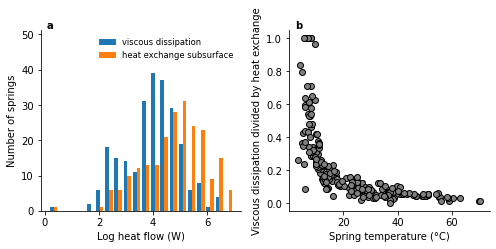

In [24]:
bins = 20

fig, axs = pl.subplots(1, 2, figsize=(7, 3.5))
#ax.scatter(dg['temperature'], dg['Hv_ratio_best'])
l = ['viscous dissipation', 'heat exchange subsurface']
#axs[0].hist([dg['Hv_net_min'] / 1e6, dg['Hv_net_best'] / 1e6, dg['Hv_net_max'] / 1e6], 
#            bins=50, label=l)
a = np.log10(dg['Hv_net_best'])
b = np.log10(dg['H_net_best'])
b[b==np.inf] = np.nan
b[b==-np.inf] = np.nan
b = b[np.isnan(b)==False]
axs[0].hist([a, b], bins=bins, label=l)
axs[0].legend(frameon=False, fontsize='small')
axs[1].scatter(dg['temperature'], dg['Hv_ratio_best'], facecolor='gray', edgecolor='black')
#axs[1].scatter(dg['log_flow_rate'], dg['temperature'], c=dg['Hv_ratio_best'], alpha=0.5)

axs[0].set_ylim(0, axs[0].get_ylim()[1] * 1.25)

axs[0].set_xlabel('Log heat flow (W)')
axs[0].set_ylabel('Number of springs')
axs[1].set_xlabel(temp_label)
axs[1].set_ylabel('Viscous dissipation divided by heat exchange')

for i, panel in enumerate(axs):
    panel.spines['top'].set_visible(False)
    panel.spines['right'].set_visible(False)
    panel.text(0.03, 1.0, string.ascii_lowercase[i], 
        weight='bold', transform=panel.transAxes, ha='left', va='bottom')
    
fig.tight_layout()
fig.savefig('fig/viscous_dissipation.pdf')

## Some stats:

In [18]:
print('circulation temp statistics:\n', dg['circulation_temp_best'].dropna().describe())
print('\ncirculation depth statistics:\n', dg['circ_depth_best'].dropna().describe())

circulation temp statistics:
 count    133.000000
mean      64.456307
std       28.875454
min       14.754632
25%       40.378492
50%       60.738275
75%       88.143429
max      129.538405
Name: circulation_temp_best, dtype: float64

circulation depth statistics:
 count     133.000000
mean     2111.605133
std      1126.479788
min       308.030706
25%      1170.562426
50%      1901.699175
75%      2996.819879
max      4675.836105
Name: circ_depth_best, dtype: float64


##

In [19]:
print('thermal footprint stats:\n')

ind1 = dg['thermal_footprint_net_min'] > 0
print(dg.loc[ind1, 'thermal_footprint_net_min'].describe())
ind2 = dg['thermal_footprint_net_max'] > 0
print(dg.loc[ind2, 'thermal_footprint_net_max'].describe())

d1 = dg.loc[ind1, 'thermal_footprint_net_min'].mean()
d2 = dg.loc[ind2, 'thermal_footprint_net_max'].mean()

r1 = np.sqrt(d1 / np.pi)
r2 = np.sqrt(d2 / np.pi)

print('mean thermal radius using mean thermal footprint: %0.2f-%0.2f km' % (r1, r2))

print('thermal radius stats:\n')

ind = dg['thermal_radius_net_min'] > 0
print(dg.loc[ind, 'thermal_radius_net_min'].describe())
ind = dg['thermal_radius_net_max'] > 0
print(dg.loc[ind, 'thermal_radius_net_max'].describe())

print('contrb. area stats:\n')
ind = dg['contributing_area'] > 0
print(dg.loc[ind, 'contributing_area'].describe())



thermal footprint stats:

count    1.680000e+02
mean     6.616958e+06
std      1.361501e+07
min      1.229163e+02
25%      1.250639e+05
50%      1.108919e+06
75%      5.464506e+06
max      9.290677e+07
Name: thermal_footprint_net_min, dtype: float64
count    2.260000e+02
mean     8.795423e+06
std      1.916466e+07
min      1.467466e+03
25%      2.350240e+05
50%      1.493743e+06
75%      6.983339e+06
max      1.464624e+08
Name: thermal_footprint_net_max, dtype: float64
mean thermal radius using mean thermal footprint: 1451.29-1673.22 km
thermal radius stats:

count     168.000000
mean      973.781713
std      1079.317595
min         6.255035
25%       199.514295
50%       594.118448
75%      1318.865419
max      5438.119340
Name: thermal_radius_net_min, dtype: float64
count     226.000000
mean     1131.925583
std      1234.974927
min        21.612704
25%       273.506430
50%       689.545559
75%      1490.017704
max      6827.915748
Name: thermal_radius_net_max, dtype: float64
contrb. 